# Optimizing Model Parameters

#### Prerequisite Code

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(root= "data", train= True, download= True, transform= ToTensor())
test_data = datasets.FashionMNIST(root= "data", train= False, download= True, transform =ToTensor())

train_dataloader = DataLoader(training_data, batch_size= 64)
test_dataloader = DataLoader(test_data, batch_size= 64)

class NeuralNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits


model= NeuralNetwork()


### Hyperparameters

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

### Optimization Loop

Each epoch consists of two main parts:
* The train loop
* The validation/test loop

### Loss Function

In [ ]:
# Initializing the loss function
loss_fn = nn.CrossEntropyLoss()

nn.CrossEntropyLoss() computes the cross entropy loss between input logits and target.
It is useful for training a classification problem with C classes.

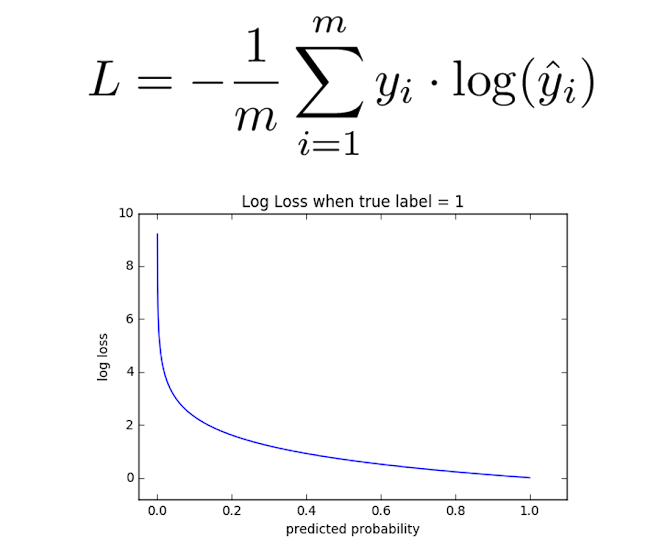

### Optimizer

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

torch.optim.SGD() implements Stochastic Gradient Descent

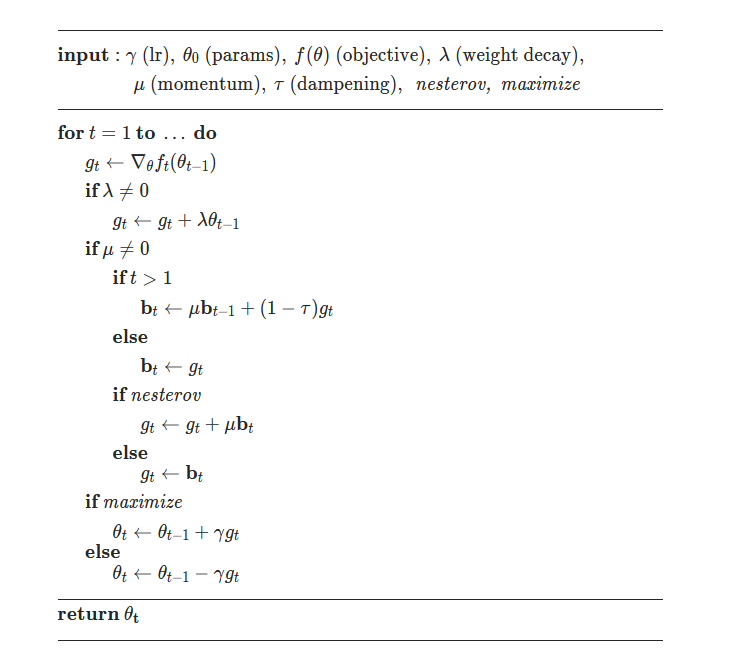

In [ ]:
model.parameters

<bound method Module.parameters of NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)>

### Full Implementation

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)

  model.train()
  for batch, (X,y) in enumerate(dataloader):

    pred = model(X)
    loss = loss_fn(pred, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"Loss: {loss:>7f} [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):

  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()


  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \nAccuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
# Copmutes loss between input logits and target
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

epochs = 25

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)

print("Done!...")

Epoch 1
-------------------------------------
Loss: 2.315149 [   64/60000]
Loss: 2.294042 [ 6464/60000]
Loss: 2.274171 [12864/60000]
Loss: 2.261808 [19264/60000]
Loss: 2.249751 [25664/60000]
Loss: 2.225298 [32064/60000]
Loss: 2.235650 [38464/60000]
Loss: 2.209345 [44864/60000]
Loss: 2.206346 [51264/60000]
Loss: 2.161105 [57664/60000]
Test Error: 
Accuracy: 32.2%, Avg loss: 2.164305 

Epoch 2
-------------------------------------
Loss: 2.181959 [   64/60000]
Loss: 2.170473 [ 6464/60000]
Loss: 2.117722 [12864/60000]
Loss: 2.131966 [19264/60000]
Loss: 2.083682 [25664/60000]
Loss: 2.030795 [32064/60000]
Loss: 2.062362 [38464/60000]
Loss: 1.993718 [44864/60000]
Loss: 1.998756 [51264/60000]
Loss: 1.920314 [57664/60000]
Test Error: 
Accuracy: 57.3%, Avg loss: 1.922801 

Epoch 3
-------------------------------------
Loss: 1.956758 [   64/60000]
Loss: 1.926910 [ 6464/60000]
Loss: 1.819034 [12864/60000]
Loss: 1.859980 [19264/60000]
Loss: 1.742199 [25664/60000]
Loss: 1.703292 [32064/60000]
Loss: 

torch.optim.Adam() implements Adam algorithm

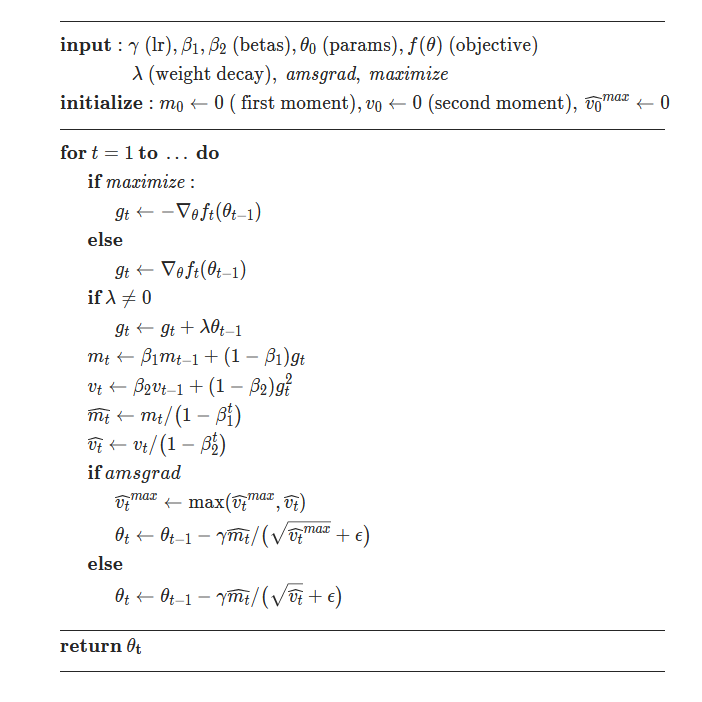

In [ ]:
loss_fn = nn.CrossEntropyLoss()
# Copmutes loss between input logits and target
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

epochs = 25

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)

print("Done!...")

Epoch 1
-------------------------------------
Loss: 0.489674 [   64/60000]
Loss: 0.517552 [ 6464/60000]
Loss: 0.362369 [12864/60000]
Loss: 0.473773 [19264/60000]
Loss: 0.435913 [25664/60000]
Loss: 0.414758 [32064/60000]
Loss: 0.365380 [38464/60000]
Loss: 0.539856 [44864/60000]
Loss: 0.492756 [51264/60000]
Loss: 0.537218 [57664/60000]
Test Error: 
Accuracy: 84.4%, Avg loss: 0.431697 

Epoch 2
-------------------------------------
Loss: 0.270612 [   64/60000]
Loss: 0.319425 [ 6464/60000]
Loss: 0.274914 [12864/60000]
Loss: 0.388886 [19264/60000]
Loss: 0.451436 [25664/60000]
Loss: 0.385457 [32064/60000]
Loss: 0.307671 [38464/60000]
Loss: 0.495104 [44864/60000]
Loss: 0.391386 [51264/60000]
Loss: 0.460463 [57664/60000]
Test Error: 
Accuracy: 85.3%, Avg loss: 0.393031 

Epoch 3
-------------------------------------
Loss: 0.216768 [   64/60000]
Loss: 0.318026 [ 6464/60000]
Loss: 0.241668 [12864/60000]
Loss: 0.330664 [19264/60000]
Loss: 0.388362 [25664/60000]
Loss: 0.345086 [32064/60000]
Loss: 

Multi Label Margin Loss

In [ ]:
loss_fn = nn.MultiLabelMarginLoss()
# Copmutes loss between input logits and target
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

epochs = 25

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)

print("Done!...")

Epoch 1
-------------------------------------


RuntimeError: ignored